<div style="text-align: right;"><h4>ФБ-24 Цадзікідзе Арсен</h4></div>
<h1><center>Лабораторна робота №4</center></h1>
<h3><center>З предмета "Засоби підготовки та аналізу даних"</center></h3>

<p><h4>Імпортую необхідні бібліотеки для роботи з даними та їх візуалізацією в середовищі Jupyter Notebook</h4></p>

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import timeit
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import OneHotEncoder
print("Setup Complete") # Setting up the coding environment

Setup Complete


In [2]:
# Set the filepath to the dataset
filepath = 'data/prsadata.csv'

# Set the filepath to the dataset
df = pd.read_csv(filepath,header=0)

# Print the data types of each column
print(df.dtypes)

# Print the number of rows
print("The DataFrame has", df.shape[0], "rows")

# Display the first five rows
df.head()

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object
The DataFrame has 43824 rows


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
# Count the number of missing values
print(df.isnull().sum())

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64


<p><h4>1. Поборотися із зниклими даними</h4></p>

In [4]:
# Remove rows contain missing values
df = df.dropna()

# Count the number of missing values
print(df.isnull().sum())

# Display the first five rows
df.head()

No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


<p><h4>2. Пронормувати вибраний датасет або стандартизувати його</h4></p>

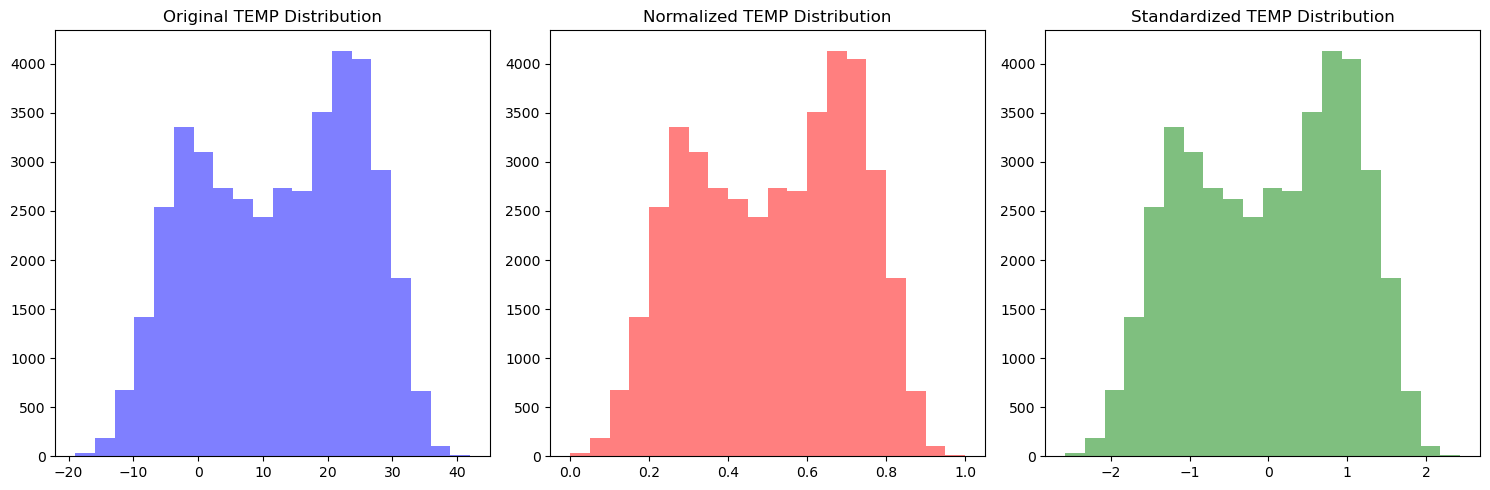

In [5]:
# Normalization function
def normalize_data(data):
    min_val = min(data)
    max_val = max(data)
    norm_data = (data - min_val) / (max_val - min_val)
    return norm_data

# Standardization function
def standardize_data(data):
    mean_val = np.mean(data)
    std_val = np.std(data)
    std_data = (data - mean_val) / std_val
    return std_data

# Calling function
normalized_TEMP = normalize_data(df['TEMP'])
standardized_TEMP = standardize_data(df['TEMP'])

# For original data
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df['TEMP'], bins=20, color='blue', alpha=0.5)
plt.title('Original TEMP Distribution')

# For normalized data
plt.subplot(1, 3, 2)
plt.hist(normalized_TEMP, bins=20, color='red', alpha=0.5)
plt.title('Normalized TEMP Distribution')

# For standartized data
plt.subplot(1, 3, 3)
plt.hist(standardized_TEMP, bins=20, color='green', alpha=0.5)
plt.title('Standardized TEMP Distribution')

plt.tight_layout()
plt.show()

<p><h4>3. Збудувати гістограму по одному із атрибутів, що буде показувати на 
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.</h4></p>

Введіть кількість діапазонів:  10


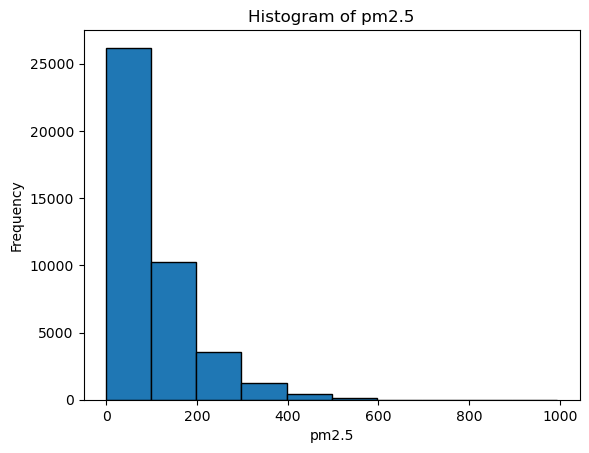

In [6]:
def build_histogram(df, attribute, num_bins):
    # Creating a histogram
    plt.hist(df[attribute], bins=num_bins, edgecolor='black')

    # Adding title and labels
    plt.title('Histogram of ' + attribute)
    plt.xlabel(attribute)
    plt.ylabel('Frequency')

    # Show histogram
    plt.show()

num_bins = int(input("Введіть кількість діапазонів: "))

# Calling the function
build_histogram(df, 'pm2.5', num_bins)

<p><h4>4. Збудувати графік залежності одного integer/real атрибута від іншого.</h4></p>

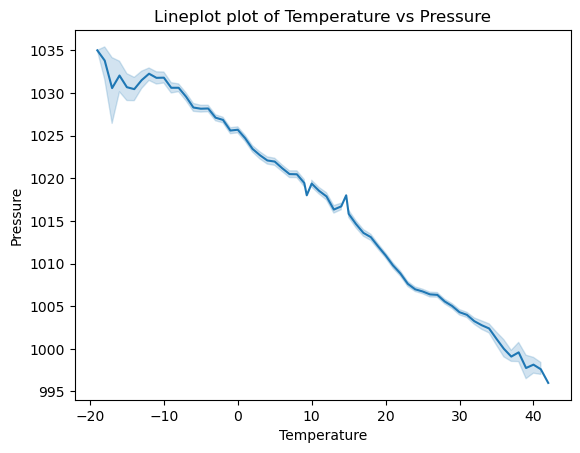

In [7]:
sns.lineplot(x='TEMP', y='PRES', data=df)
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.title('Lineplot plot of Temperature vs Pressure')
plt.show()

<p><h4>5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real 
атрибутів.</h4></p>

In [8]:
# Select two attributes for calculating coefficients
attr1 = df['TEMP']
attr2 = df['PRES']

# Pearson's coefficient
pearson_corr, _ = pearsonr(attr1, attr2)
print("Pearson correlation coefficient:", pearson_corr)

# Spearman's coefficient
spearman_corr, _ = spearmanr(attr1, attr2)
print("Spearman correlation coefficient:", spearman_corr)

Pearson correlation coefficient: -0.8269028146158961
Spearman correlation coefficient: -0.8323043435035902


<p><h4>6. Провести One Hot Encoding категоріального string атрибуту.</h4></p>

In [9]:
# select the column for One Hot Encoding (for example, 'cbwd')
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df[['cbwd']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names(['cbwd']))

# Add encoded data to the original dataset
df_encoded = pd.concat([df, encoded_df], axis=1)

# First 100 rows
df_encoded.head(100)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
24,25.0,2010.0,1.0,2.0,0.0,129.0,-16.0,-4.0,1020.0,SE,1.79,0.0,0.0,0.0,0.0,1.0,0.0
25,26.0,2010.0,1.0,2.0,1.0,148.0,-15.0,-4.0,1020.0,SE,2.68,0.0,0.0,0.0,0.0,1.0,0.0
26,27.0,2010.0,1.0,2.0,2.0,159.0,-11.0,-5.0,1021.0,SE,3.57,0.0,0.0,0.0,0.0,1.0,0.0
27,28.0,2010.0,1.0,2.0,3.0,181.0,-7.0,-5.0,1022.0,SE,5.36,1.0,0.0,0.0,0.0,1.0,0.0
28,29.0,2010.0,1.0,2.0,4.0,138.0,-7.0,-5.0,1022.0,SE,6.25,2.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,120.0,2010.0,1.0,5.0,23.0,50.0,-22.0,-16.0,1033.0,NW,23.70,0.0,0.0,0.0,1.0,0.0,0.0
120,121.0,2010.0,1.0,6.0,0.0,56.0,-25.0,-17.0,1033.0,NW,26.83,0.0,0.0,0.0,1.0,0.0,0.0
121,122.0,2010.0,1.0,6.0,1.0,77.0,-25.0,-14.0,1033.0,NE,4.02,0.0,0.0,0.0,0.0,0.0,1.0
122,123.0,2010.0,1.0,6.0,2.0,50.0,-26.0,-14.0,1034.0,NE,8.04,0.0,0.0,0.0,0.0,0.0,1.0


<p><h4>7. Провести візуалізацію багатовимірних даних, використовуючи 
приклади, наведені у медіумі</h4></p>

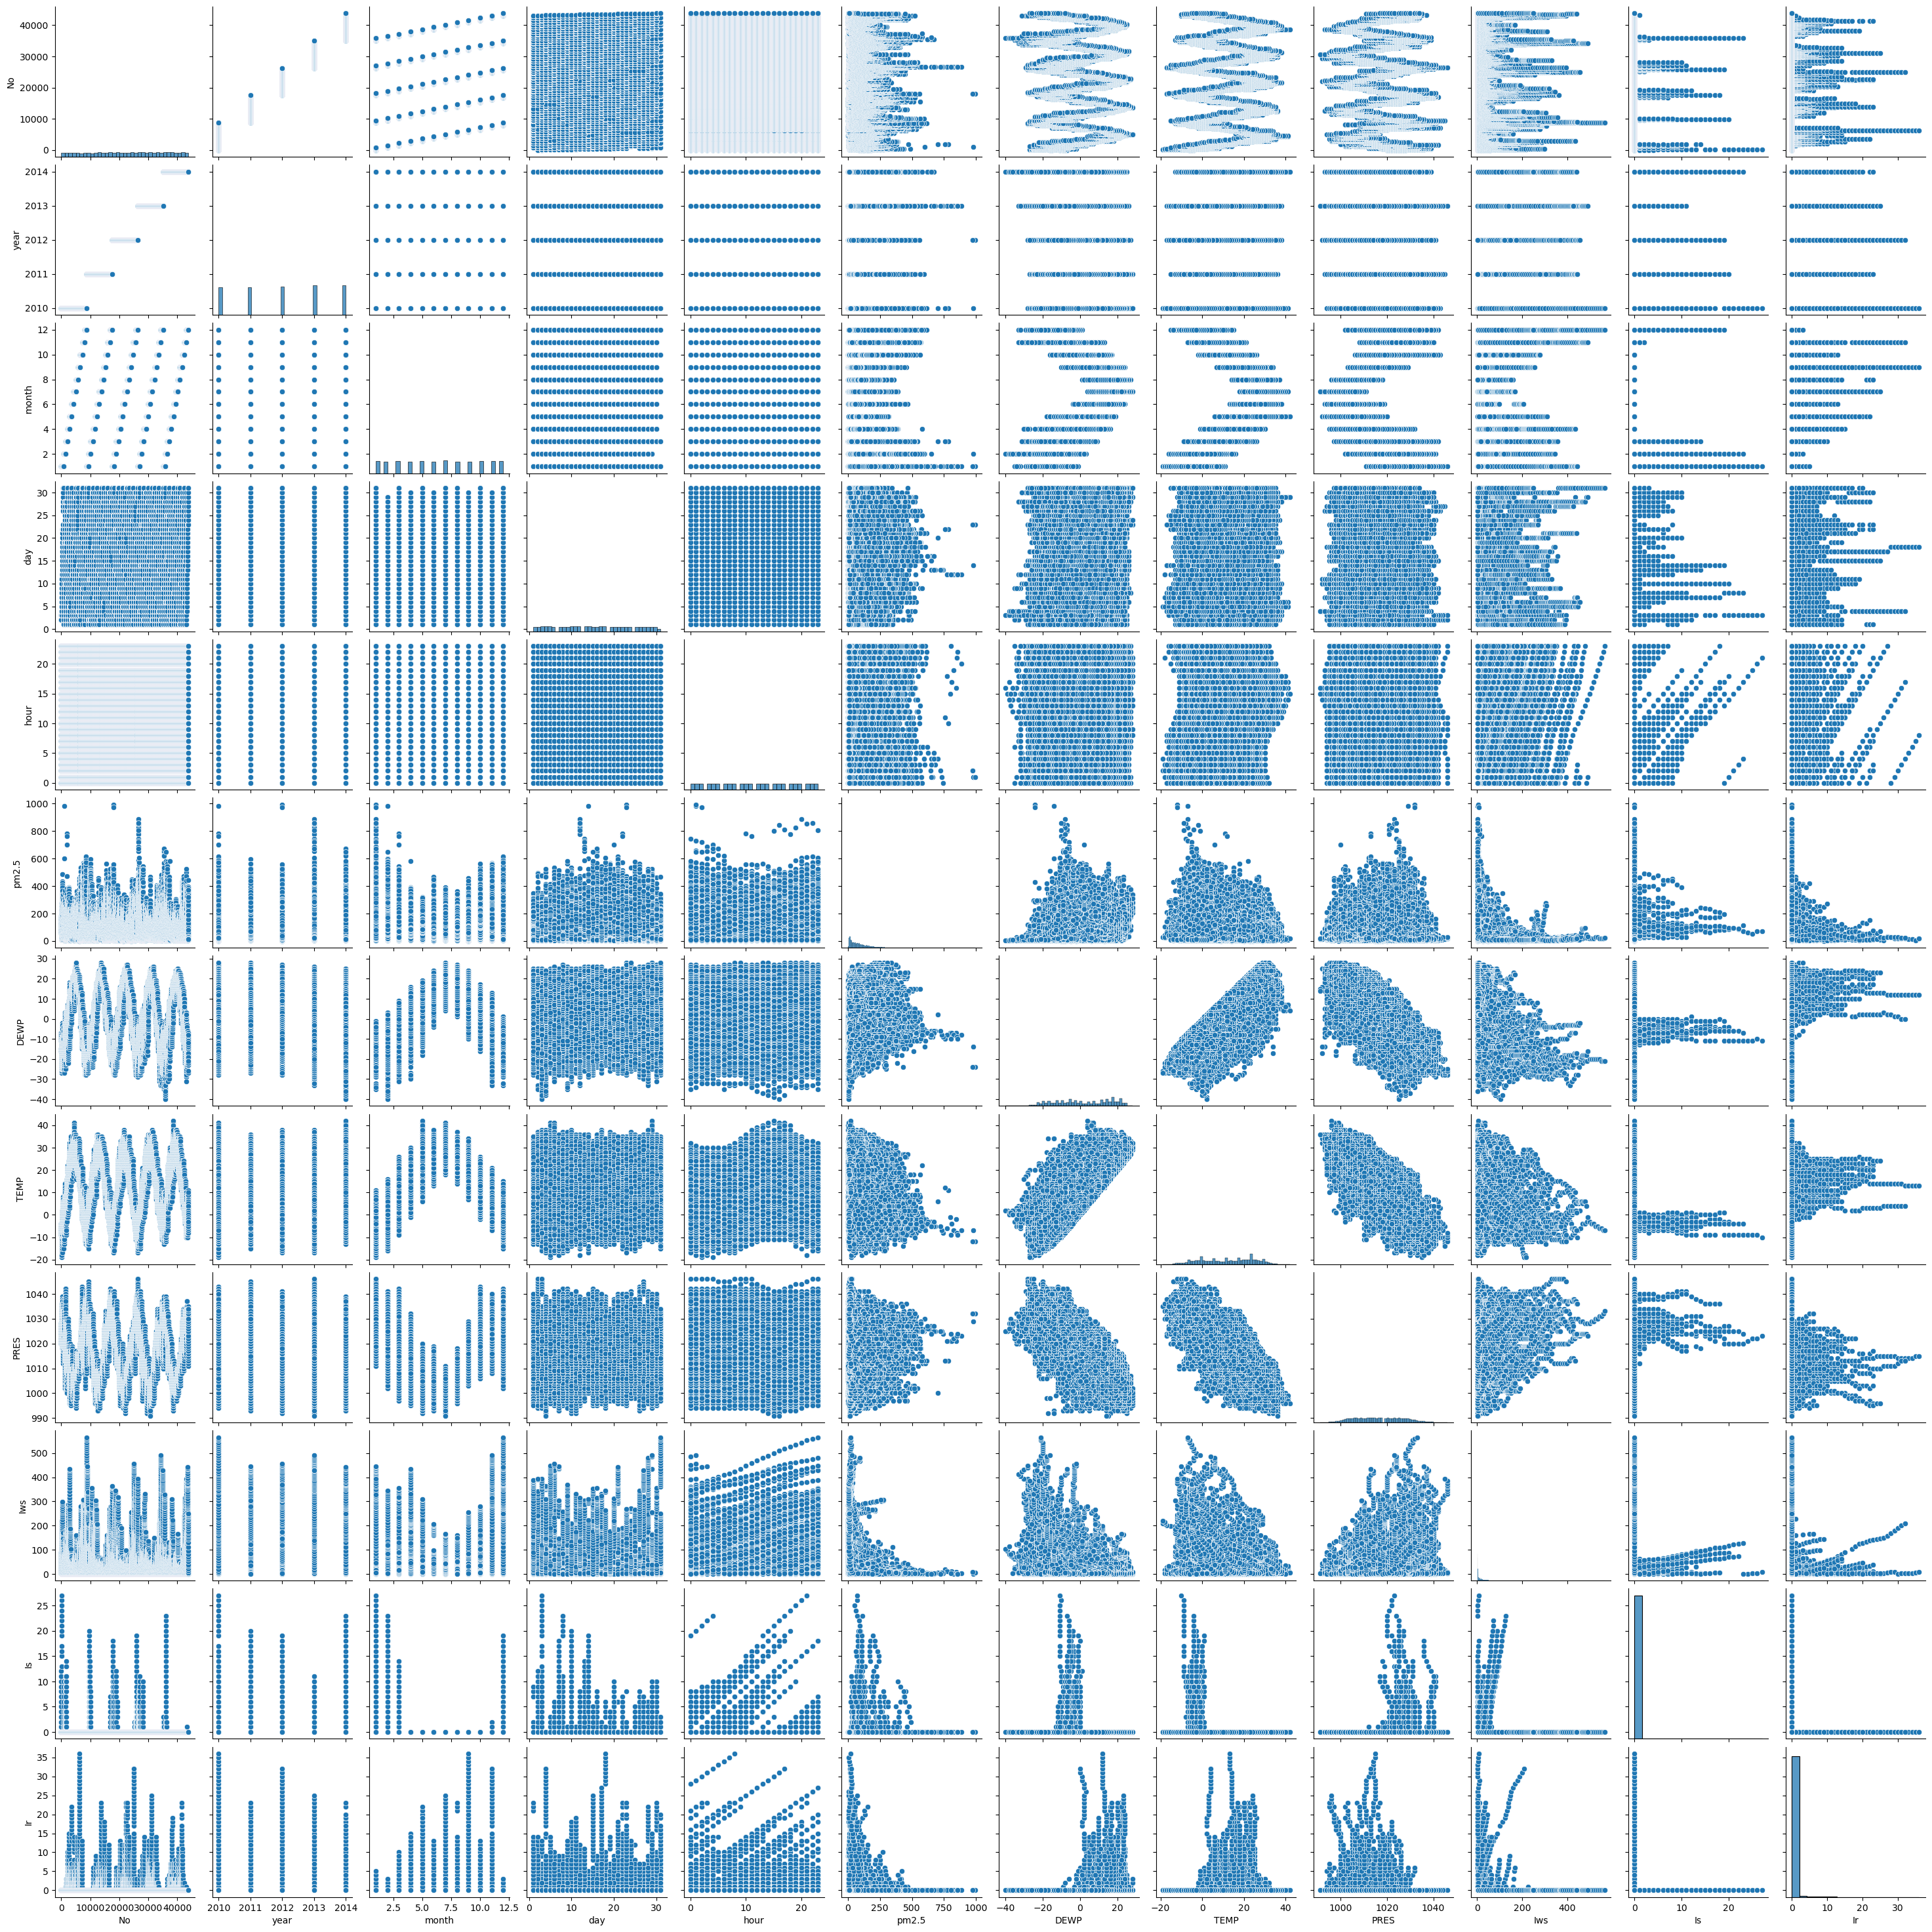

In [10]:
# Use sns.pairplot to plot all features of the data set
sns.pairplot(df)
plt.show()